# Setup

## Import Libraries and Define Paths

Import the necessary libraries (pandas, numpy, os, warnings) and define the paths for input (historical and current year datasets) and the merged output dataset. Also create the output directory if it does not exist.

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Path to the datasets (for local environment)
base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "JupyterOutputs"))
year_to_date_dataset = os.path.join(base_dir, "Raw", "NYPD_Complaint_Data_Current__Year_To_Date__20250410.csv")
historic_dataset = os.path.join(base_dir, "Raw", "NYPD_Complaint_Data_Historic_20250313.csv")
output_dataset = os.path.join(base_dir, "Merged", "NYPD_Complaints_Merged.csv")

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_dataset), exist_ok=True)

# Data Loading and Merging

Load the two source CSV files, align their columns (adding NaN for missing columns), concatenate them, convert 'CMPLNT_FR_DT' column to datetime, filter records from 2020 onwards, and save the merged dataset. Include fallback mechanisms for potential errors.

In [2]:
print("=== Data Loading and Merging ===")
print(f"Loading historic dataset from {historic_dataset}...")
print(f"Loading year-to-date dataset from {year_to_date_dataset}...")

# Check if datasets exist
historic_exists = os.path.exists(historic_dataset)
ytd_exists = os.path.exists(year_to_date_dataset)

df = None # Initialize df to None

if historic_exists and ytd_exists:
    # Load the datasets
    try:
        historic_df = pd.read_csv(historic_dataset)
        year_to_date_df = pd.read_csv(year_to_date_dataset)

        print(f"Historic dataset shape: {historic_df.shape}")
        print(f"Year-to-date dataset shape: {year_to_date_df.shape}")

        print("Year-to-date columns:")
        print(year_to_date_df.columns.tolist())

        print("Historic columns:")
        print(historic_df.columns.tolist())

        # Align columns (adds NaN for missing columns)
        print("Aligning columns between datasets...")
        common_columns = year_to_date_df.columns.union(historic_df.columns)
        historic_df_aligned = historic_df.reindex(columns=common_columns)
        year_to_date_df_aligned = year_to_date_df.reindex(columns=common_columns)

        # Merge the two datasets
        print("Merging datasets...")
        merged_df = pd.concat([historic_df_aligned, year_to_date_df_aligned], ignore_index=True)

        # Convert CMPLNT_FR_DT to datetime
        print("Converting CMPLNT_FR_DT to datetime...")
        merged_df['CMPLNT_FR_DT'] = pd.to_datetime(merged_df['CMPLNT_FR_DT'], errors='coerce')

        # Filter out rows before 2020
        print("Filtering data from 2020 onwards...")
        merged_df = merged_df[merged_df['CMPLNT_FR_DT'] >= '2020-01-01']

        # Save the merged dataset
        print(f"Saving merged and filtered dataset to {output_dataset}...")
        merged_df.to_csv(output_dataset, index=False)

        print(f"Merge and filtering completed. Total rows from 2020 onwards: {merged_df.shape[0]}")
        print(f"Merged dataset saved to {output_dataset}")

        # Continue with the existing dataset for prepreprocessing
        df = merged_df
    except Exception as e:
        print(f"Error during dataset merging: {e}")
        print("Attempting to load the pre-merged dataset instead...")
        # Try to load the pre-merged dataset as fallback
        if os.path.exists(output_dataset):
            try:
                df = pd.read_csv(output_dataset)
                print(f"Pre-merged dataset loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns")
            except Exception as load_err:
                 print(f"Error loading pre-merged dataset {output_dataset}: {load_err}")
                 raise RuntimeError(f"Could not load any dataset: {load_err}")
        else:
            print(f"Error: Could not load pre-merged dataset {output_dataset}")
            raise FileNotFoundError(f"No datasets available for processing")
else:
    print("One or both datasets do not exist.")
    if not historic_exists:
        print(f"Historic dataset not found at: {historic_dataset}")
    if not ytd_exists:
        print(f"Year-to-date dataset not found at: {year_to_date_dataset}")
    raise FileNotFoundError("Required datasets are missing. Please check the file paths.")

# Final check if df was loaded
if df is None:
    print("Error: DataFrame 'df' could not be loaded or created.")
    raise RuntimeError("DataFrame loading failed")

=== Data Loading and Merging ===
Loading historic dataset from c:\Users\ferdi\Documents\GitHub\crime-analyzer\JupyterOutputs\Raw\NYPD_Complaint_Data_Historic_20250313.csv...
Loading year-to-date dataset from c:\Users\ferdi\Documents\GitHub\crime-analyzer\JupyterOutputs\Raw\NYPD_Complaint_Data_Current__Year_To_Date__20250410.csv...
Historic dataset shape: (8914838, 35)
Year-to-date dataset shape: (577108, 36)
Year-to-date columns:
['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column']
Historic columns:
['CMPLNT_NUM', 'C

  # Exploratory Data Analysis (EDA)

  This section gives a quick overview of data quality and main distributions to support preprocessing. It shows the dataset shape and columns, detects and removes duplicates, checks the date range (`CMPLNT_FR_DT`), and summarizes missing values with a table and chart. Key distributions include monthly complaint trends since 2020, top offenses (`OFNS_DESC`), severity (`LAW_CAT_CD`), and boroughs (`BORO_NM`).


=== Data Preprocessing - Initial Overview ===
Dataset loaded successfully: 2512541 rows, 36 columns.
Columns (first 20): ['ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'Lat_Lon', 'Latitude', 'Longitude', 'New Georeferenced Column', 'OFNS_DESC']
No duplicate rows found.
Date range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00

Top missing columns:
                          missing   pct
TRANSIT_DISTRICT          2443447  97.3
New Georeferenced Column  1936566  77.1
HOUSING_PSA                540598  21.5
CMPLNT_TO_DT               180993   7.2
PD_CD                        2090   0.1
ADDR_PCT_CD                    97   0.0
Lat_Lon                        28   0.0
Longitude                      28   0.0
Latitude                       28   0.0
X_COORD_CD                     24   0.0
Y_COORD_CD                

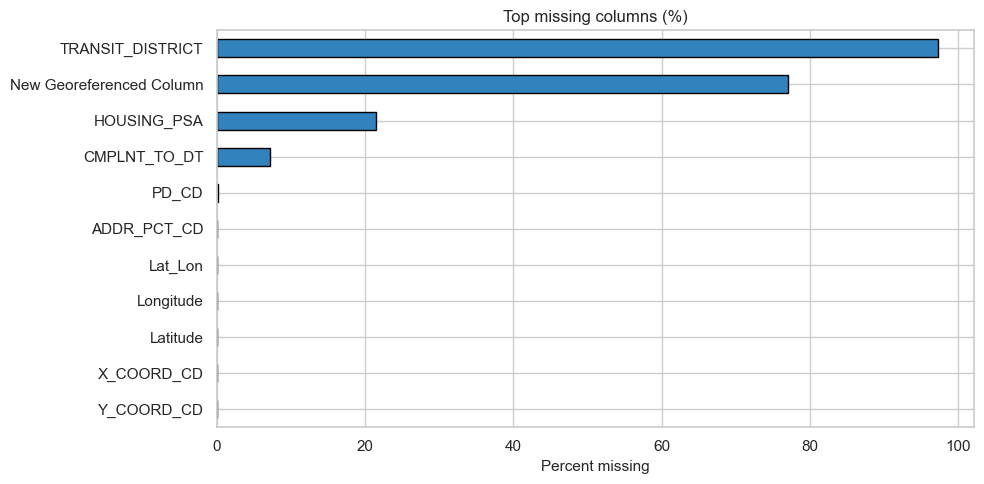

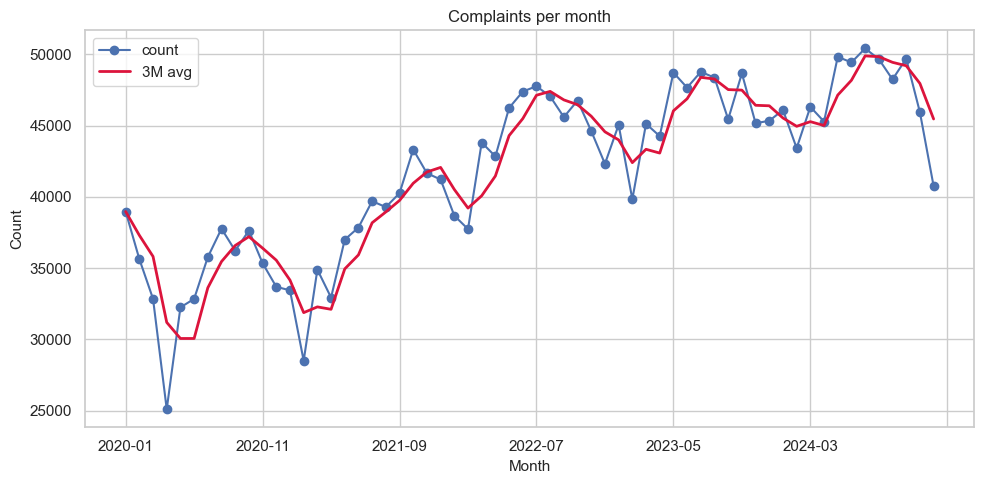

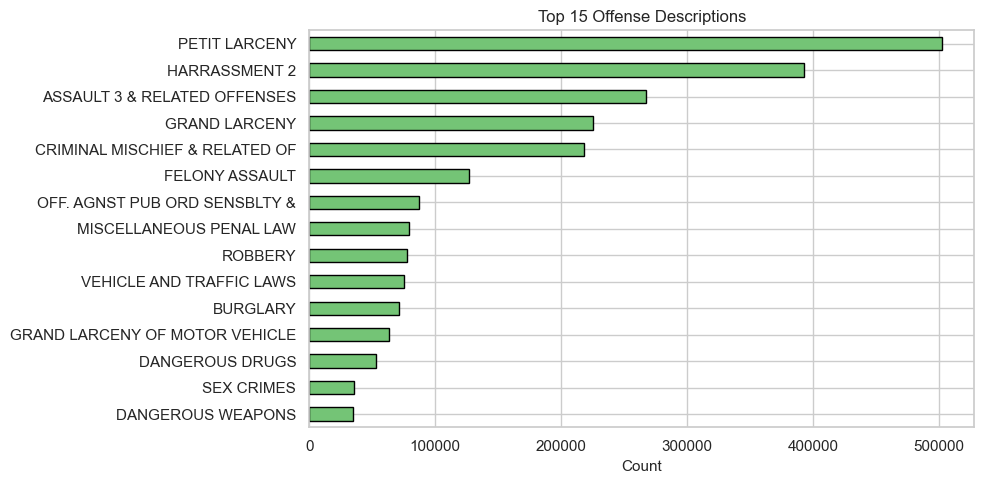

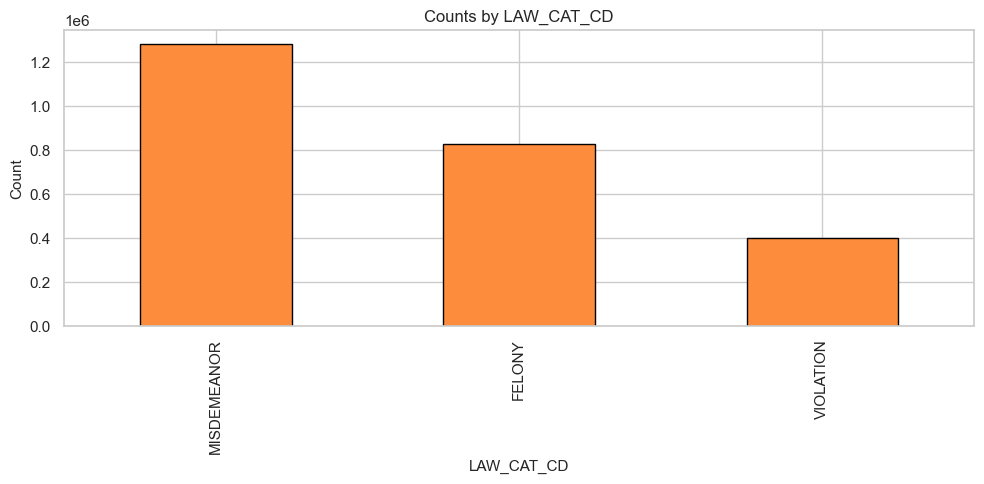

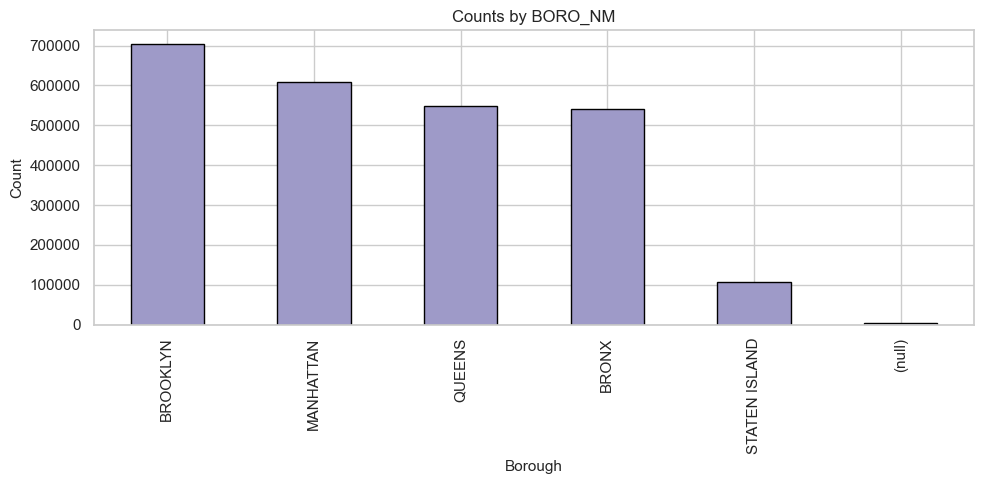

In [3]:
print("\n=== Data Preprocessing - Initial Overview ===")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11

# 1) Dataset overview
n_rows, n_cols = df.shape
print(f"Dataset loaded successfully: {n_rows} rows, {n_cols} columns.")
print("Columns (first 20):", list(df.columns[:20]))

# 2) Duplicate handling
duplicates = int(df.duplicated().sum())
if duplicates > 0:
    pct = duplicates / max(len(df), 1) * 100
    print(f"Found {duplicates} duplicate rows ({pct:.2f}%). Removing...")
    df = df.drop_duplicates()
    print(f"After deduplication: {len(df)} rows")
else:
    print("No duplicate rows found.")

# 3) Date sanity
if "CMPLNT_FR_DT" in df.columns:
    try:
        # Ensure dtype is datetime
        if not np.issubdtype(df["CMPLNT_FR_DT"].dtype, np.datetime64):
            df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors="coerce")
        dt_min, dt_max = df["CMPLNT_FR_DT"].min(), df["CMPLNT_FR_DT"].max()
        print(f"Date range: {dt_min} to {dt_max}")
    except Exception as e:
        print(f"Could not compute date range for CMPLNT_FR_DT: {e}")
else:
    print("Column 'CMPLNT_FR_DT' not found; skipping date range.")

# 4) Missingness summary
print("\nTop missing columns:")
missing_summary = df.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
if len(missing_summary) > 0:
    top_n = 15
    display_df = (
        missing_summary.head(top_n)
        .to_frame("missing")
        .assign(pct=lambda d: (d["missing"] / len(df) * 100).round(1))
    )
    print(display_df)
    # Plot missingness
    ax = (
        display_df[::-1]["pct"]
        .plot(kind="barh", color="#3182bd", edgecolor="black")
    )
    ax.set_title("Top missing columns (%)")
    ax.set_xlabel("Percent missing")
    ax.set_ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found.")

# 5) Time trend by month
if "CMPLNT_FR_DT" in df.columns:
    dt = df["CMPLNT_FR_DT"].dropna().copy()
    if not dt.empty:
        s = (
            dt.dt.to_period("M").value_counts().sort_index().rename_axis("month").to_frame("count")
        )
        s.index = s.index.astype(str)
        ax = s["count"].plot(marker="o")
        ax.set_title("Complaints per month")
        ax.set_xlabel("Month")
        ax.set_ylabel("Count")
        # Rolling avg for smoothing
        if len(s) >= 3:
            s_roll = s["count"].rolling(3, min_periods=1).mean()
            ax.plot(s_roll.index, s_roll.values, color="crimson", linewidth=2, label="3M avg")
            ax.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No valid dates to plot monthly trend.")

# 6) Offense distribution (top N)
if "OFNS_DESC" in df.columns:
    top_n = 15
    vc = df["OFNS_DESC"].astype(str).value_counts().head(top_n)[::-1]
    ax = vc.plot(kind="barh", color="#74c476", edgecolor="black")
    ax.set_title(f"Top {top_n} Offense Descriptions")
    ax.set_xlabel("Count")
    ax.set_ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'OFNS_DESC' not found; skipping offense distribution.")

# 7) Severity distribution (LAW_CAT_CD)
if "LAW_CAT_CD" in df.columns:
    vc = df["LAW_CAT_CD"].astype(str).value_counts()
    ax = vc.plot(kind="bar", color="#fd8d3c", edgecolor="black")
    ax.set_title("Counts by LAW_CAT_CD")
    ax.set_xlabel("LAW_CAT_CD")
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'LAW_CAT_CD' not found; skipping severity distribution.")

# 8) Geographic distribution (BORO_NM)
if "BORO_NM" in df.columns:
    vc = df["BORO_NM"].astype(str).value_counts()
    ax = vc.plot(kind="bar", color="#9e9ac8", edgecolor="black")
    ax.set_title("Counts by BORO_NM")
    ax.set_xlabel("Borough")
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'BORO_NM' not found; skipping borough distribution.")

# Data Cleaning - Column Removal

Remove specified irrelevant, redundant, or non-useful columns from the DataFrame to reduce dimensionality and noise. Warn if columns not present.

In [4]:
# List of columns to remove
columns_to_remove = [
    'CMPLNT_NUM', 'ADDR_PCT_CD', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM',
    'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE',
    'JURIS_DESC', 'PATROL_BORO', 'PD_DESC', 'RPT_DT', 'STATION_NAME',
    'TRANSIT_DISTRICT', 'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon',
    'New Georeferenced Column'
]

print(f"Attempting to remove columns: {columns_to_remove}")

# Verify existing columns to remove
existing_columns = [col for col in columns_to_remove if col in df.columns]
missing_columns = [col for col in columns_to_remove if col not in df.columns]

if missing_columns:
    print(f"Warning: the following columns intended for removal are not present in the dataset: {missing_columns}")

# Remove specified columns (only those that exist)
df_cleaned = df.drop(columns=existing_columns, errors='ignore')
print(f"Removed columns: {existing_columns}")

# Information about the dataset after cleaning
print(f"Final cleaned dataset: {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns")
print(f"Columns in the final dataset: {df_cleaned.columns.tolist()}")

# Display the first rows of the cleaned dataset
print("\n=== First rows of the final cleaned dataset ===")
print(df_cleaned.head())


Attempting to remove columns: ['CMPLNT_NUM', 'ADDR_PCT_CD', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'PATROL_BORO', 'PD_DESC', 'RPT_DT', 'STATION_NAME', 'TRANSIT_DISTRICT', 'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon', 'New Georeferenced Column']
Removed columns: ['CMPLNT_NUM', 'ADDR_PCT_CD', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'PATROL_BORO', 'PD_DESC', 'RPT_DT', 'STATION_NAME', 'TRANSIT_DISTRICT', 'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon', 'New Georeferenced Column']
Final cleaned dataset: 2512541 rows and 18 columns
Columns in the final dataset: ['BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'Latitude', 'Longitude', 'OFNS_DESC', 'PARKS_NM', 'PD_CD', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']

=== First rows of the final cleaned dataset ===
     B

# Save Cleaned Dataset

Save the cleaned dataset (with selected columns removed) to the 'PrePreProcessed' directory. Ensures consistency with the global pipeline and provides a standardized input for downstream processing.

In [5]:
# Save the cleaned dataset
output_dir = os.path.join(base_dir, "PrePreProcessed")
os.makedirs(output_dir, exist_ok=True)
print(f"Saving to output directory: {output_dir}")

cleaned_file_path = os.path.join(output_dir, "cleaned_crime_data.csv")
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")

print("\n=== Preprocessing completed ===")

Saving to output directory: c:\Users\ferdi\Documents\GitHub\crime-analyzer\JupyterOutputs\PrePreProcessed
Cleaned dataset saved to: c:\Users\ferdi\Documents\GitHub\crime-analyzer\JupyterOutputs\PrePreProcessed\cleaned_crime_data.csv

=== Preprocessing completed ===
